In [1]:
import numpy as np
from stochpy.dynamics.diffusion1d import Wiener1D

# Monte-Carlo simulation of 1D diffusions

In [2]:
np.random.seed(seed=100)

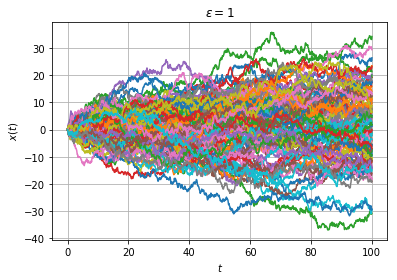

In [3]:
Wiener1D().trajectoryplot(*[Wiener1D().trajectory(0.,0.,T=100) for n in range(100)], title=r'$\epsilon=1$');

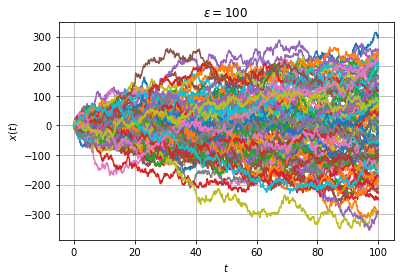

In [4]:
Wiener1D().trajectoryplot(*[Wiener1D(100).trajectory(0.,0.,T=100) for n in range(100)], title=r'$\epsilon=100$');

# Numerical solution of the Fokker-Planck equation

## Testing timestep

The time step *dt* should be much smaller than *dx^2/D*, with *dx* the spatial resolution and *D* the diffusivity

### Testing *dt* at fixed *dx=0.1* and varying *D*

In [5]:
from stochpy.io.plot import pdf_plot1d
from stochpy.fokkerplanck import FokkerPlanck1D
import numpy as np

/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/corentin/Library/Python/3.7/lib/python/site-packages/stochpy-0.0.1-py3.7.egg/stochpy/fokkerplanck.py:153: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


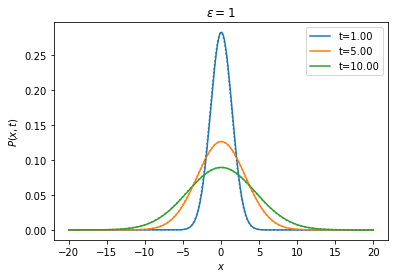

In [6]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 5.0, 10.0, dt=0.001, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D()._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 5, 10)), fig=fig, ax=ax);

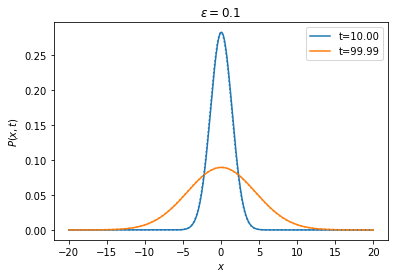

In [7]:
fpe = FokkerPlanck1D(Wiener1D().drift, 0.1)
fpgen = fpe.fpintegrate_generator(10.0, 100.0, dt=0.01, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=0.1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=0.1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (10, 100)), fig=fig, ax=ax);

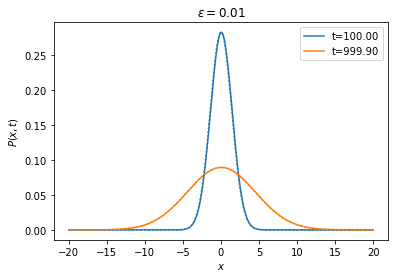

In [8]:
fpe = FokkerPlanck1D(Wiener1D().drift, 0.01)
fpgen = fpe.fpintegrate_generator(100.0, 1000.0, dt=0.1, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=0.01$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=0.01)._fpthsol(x, t), {'ls': 'dotted'}) for t in (100, 1000)), fig=fig, ax=ax);

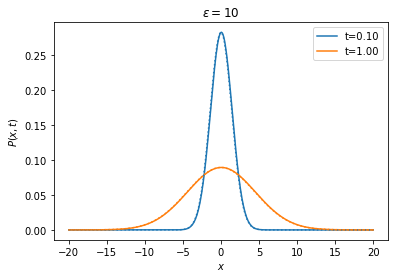

In [9]:
fpe = FokkerPlanck1D(Wiener1D().drift, 10)
fpgen = fpe.fpintegrate_generator(0.1, 1.0, dt=0.0001, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=10$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=10)._fpthsol(x, t), {'ls': 'dotted'}) for t in (0.1, 1)), fig=fig, ax=ax);

### Testing *dt* at fixed *D=1* and varying *dx*

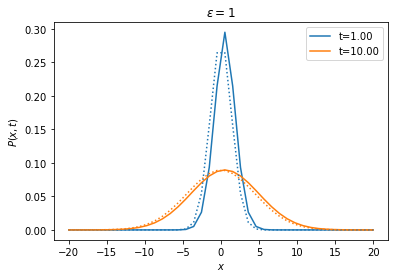

In [10]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, dt=0.1, npts=40, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=40)
pdf_plot1d(*((x, Wiener1D(D=1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 10)), fig=fig, ax=ax);

## Testing Boundary Conditions

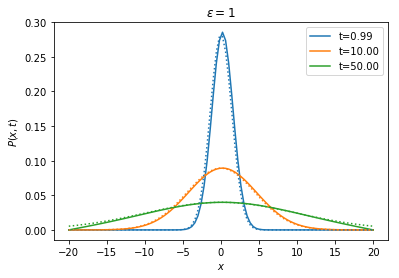

In [11]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, 50, dt=0.01, npts=100, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=100)
pdf_plot1d(*((x, Wiener1D(D=1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 10, 50)), fig=fig, ax=ax);

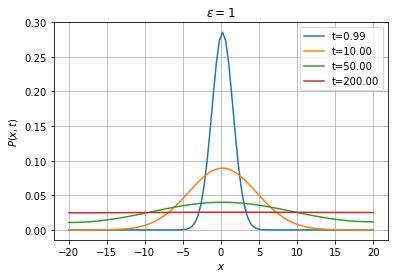

In [12]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, 50, 200, dt=0.01, npts=100, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('reflecting', 'reflecting'))
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$');

## Testing the numerical schemes

With the *implicit* and *Crank-Nicolson* schemes, we can afford using much larger timesteps than with the explicit method.

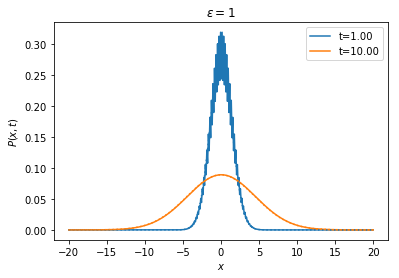

In [13]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, dt=0.005, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='explicit')
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 10)), fig=fig, ax=ax);

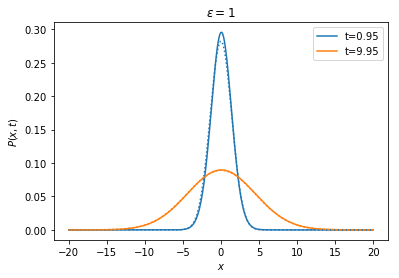

In [14]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, dt=0.05, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='implicit')
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 10)), fig=fig, ax=ax);

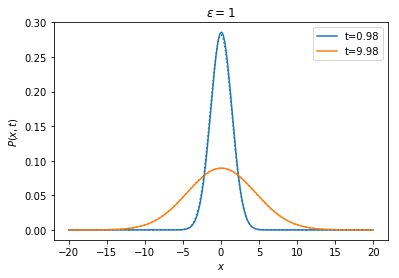

In [15]:
fpe = FokkerPlanck1D(Wiener1D().drift, 1)
fpgen = fpe.fpintegrate_generator(1.0, 10, dt=0.025, npts=400, bounds=(-20.0, 20.0), 
                                  t0=0.0, P0='dirac', bc=('absorbing', 'absorbing'), method='cn')
fig, ax = pdf_plot1d(*((np.array(X), np.array(P), {'label': 't='+format(t, '.2f')}) for t, X, P in fpgen), 
                     title=r'$\epsilon=1$')
ax.set_prop_cycle(None) # reset colors
x = np.linspace(-20., 20., num=400)
pdf_plot1d(*((x, Wiener1D(D=1)._fpthsol(x, t), {'ls': 'dotted'}) for t in (1, 10)), fig=fig, ax=ax);